This pipeline opens the result of ICAalamelodic.m, lets the user interactively label the components that look like neuronal activity (rather than movement artefacts or noise), sort them by label, plots a final summary for the chosen components, and save the reordered maps and time series.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
%matplotlib inline 
import pylab

Open time series

In [2]:
import scipy.io as sio

In [3]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/db554c18-e3eb-41e2-afad-7de1c92bf4a5/THDDCGCaMP62/100411series/100411alloncregcdFF20skfintminMB206Smith0_4_60TS.mat


In [4]:
Ua=sio.loadmat(filename)

In [5]:
DT=Ua['TSmean']

In [6]:
DT.shape

(31289, 206)

In [7]:
S1=DT.shape

In [8]:
DTmean=np.zeros(S1)
DTvar=np.zeros(S1)
Var=np.zeros(S1[1])

In [9]:
for i in range(S1[1]):
    DTmean[:,i]=DT[:,i]-np.mean(DT[:,i],0)

In [10]:
for i in range(S1[1]):
    Var[i]=np.sqrt(np.var(DTmean[:,i]))
    DTvar[:,i]=DTmean[:,i]/Var[i]

In [11]:
DTvar.shape

(31289, 206)

open maps

In [12]:
import nibabel as nb

In [13]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/test7/THDDCGCaMP62/100411series/100411alloncregcdFF20skfintminMB206Smith0_4_60IC.nii


In [14]:
img1 = nb.load(filename2)

In [15]:
data = img1.get_data()

In [16]:
S=data.shape

In [17]:
S

(35, 22, 26, 206)

# Zscore maps

In [18]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

Transform the maps to have zero mean

In [19]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

Transform the maps to have unit variance and zscore

In [20]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
Dmaps[Dmaps<0]=0

Order ICs by variance

In [21]:
datao=data
Dmapso=Dmaps

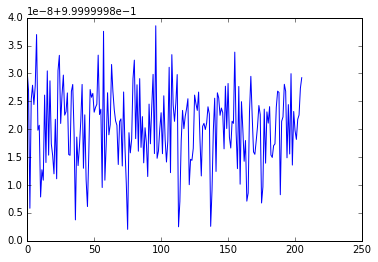

In [22]:
plt.plot(Var)

#Separate maps in substacks, sort the independent components by brain regions 

In [23]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (13, 2.5)

In [24]:
Dtemp=data[:,:,:,0]

In [25]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

<IPython.core.display.Javascript object>

In [26]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=Dtemp[:,:,range(Nstack)]
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        #Dmean[:,:,i]=np.max(Vmean,0)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

/usr/local/lib/python2.7/dist-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


In [27]:
DTvar.shape

(31289, 206)

In [28]:
S

(35, 22, 26, 206)

In [29]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/test7/THDDCGCaMP62/100411series/100411seriesXk.mat


In [30]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']
#Xk[1,:]=Ua['Walk']

In [31]:
Xk.shape

(31289, 6)

/media/test7/THDDCGCaMP62/100411series/MAX_100411alloncregcdFF20skfintminMB206Smith0_4_60IC.nii


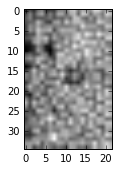

In [32]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape


if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    Dmean=np.zeros([S[0],S[1],Nstack])
    #Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean

plt.imshow(Vmean,cmap=plt.cm.gray)

In [33]:
Xk=Xk.T

In [34]:
Label_ICs=[]

0


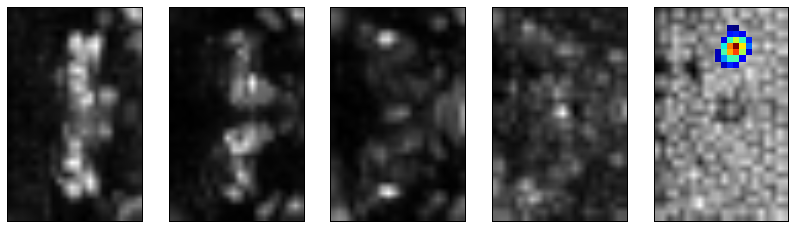

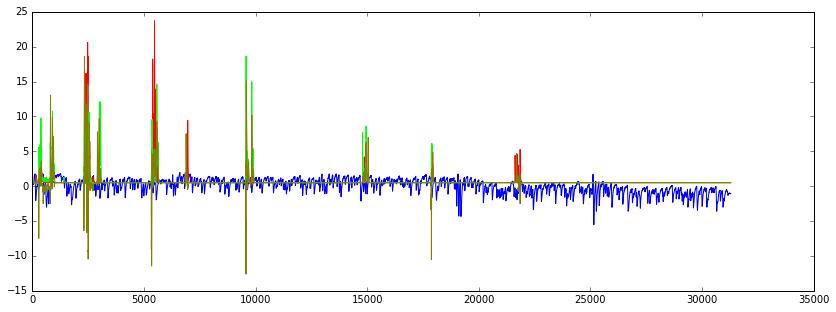


1


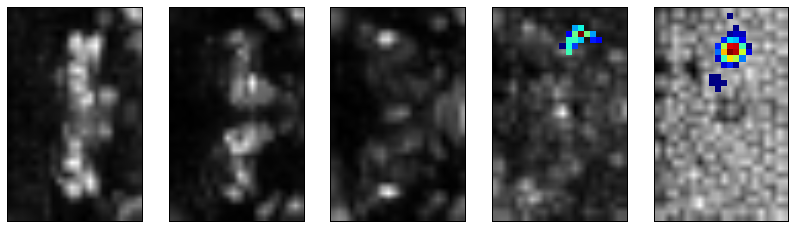

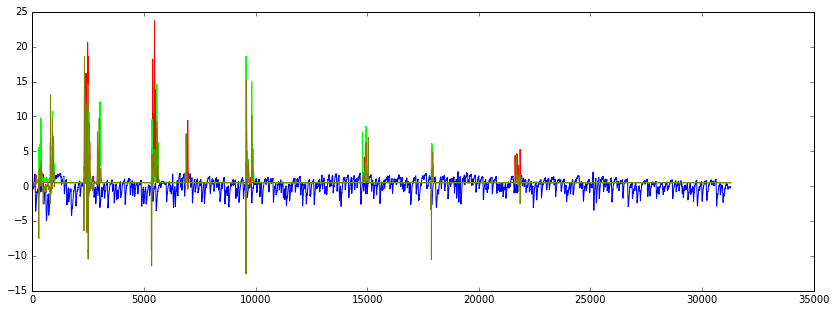


2


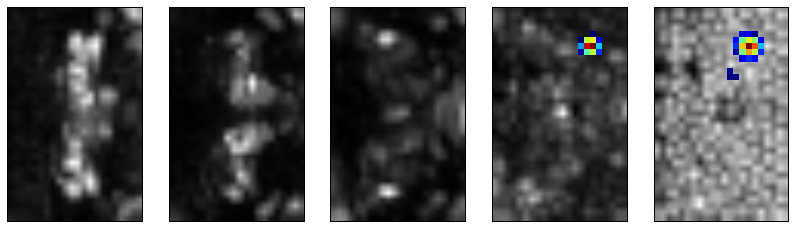

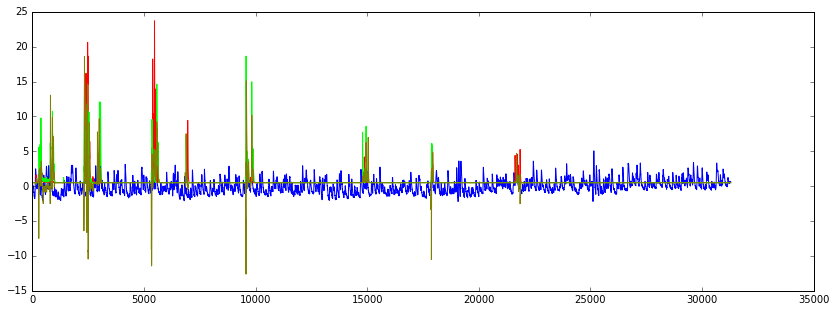


3


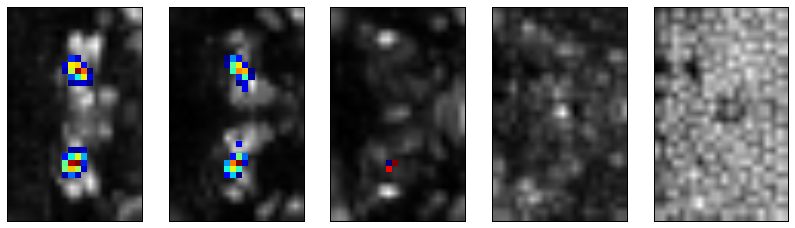

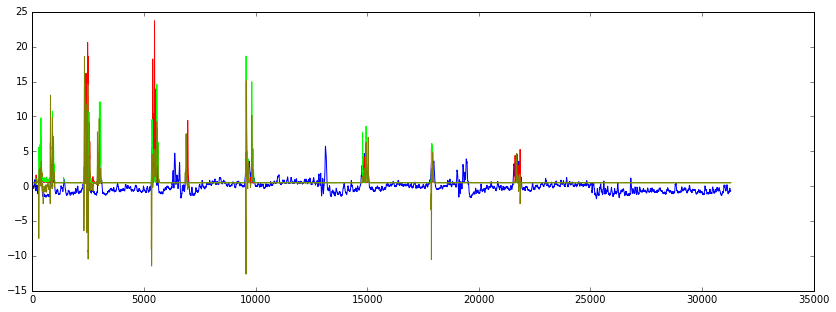


4


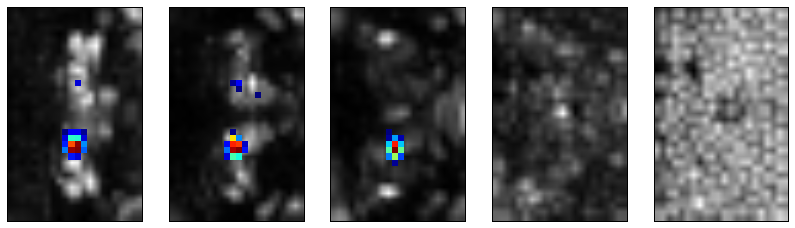

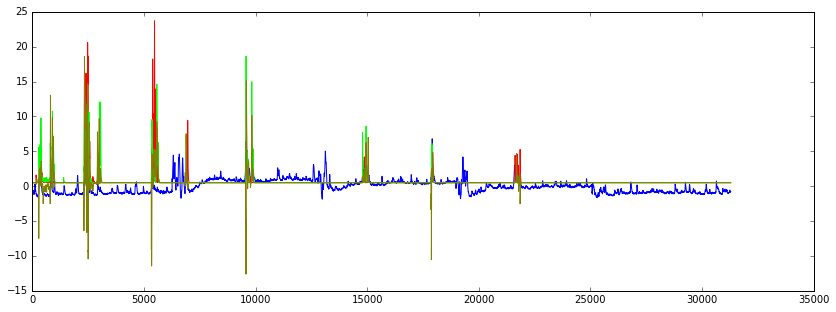


5


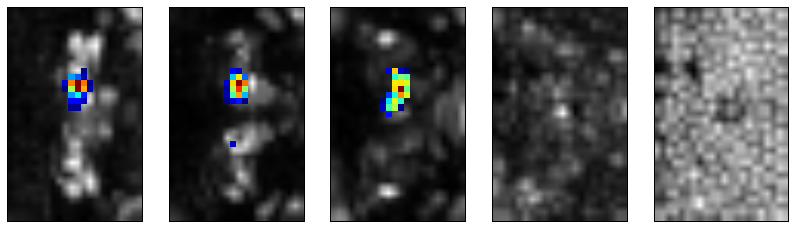

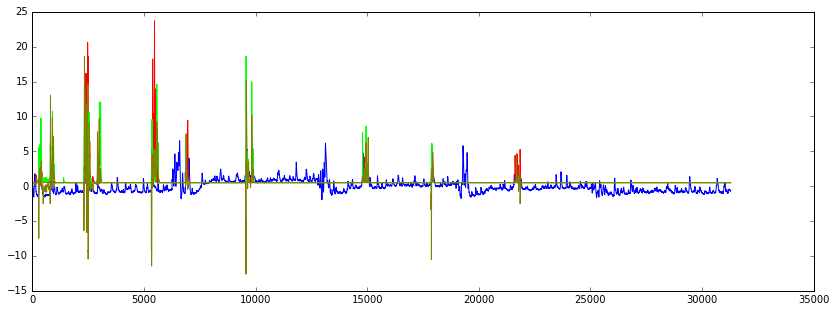


6


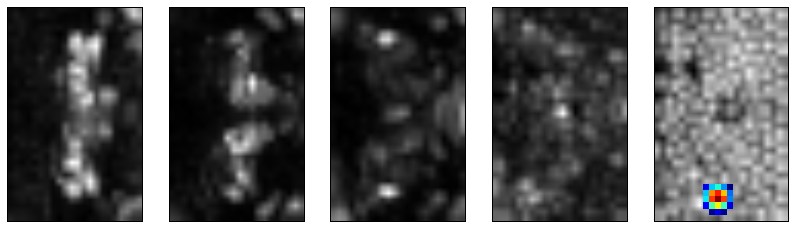

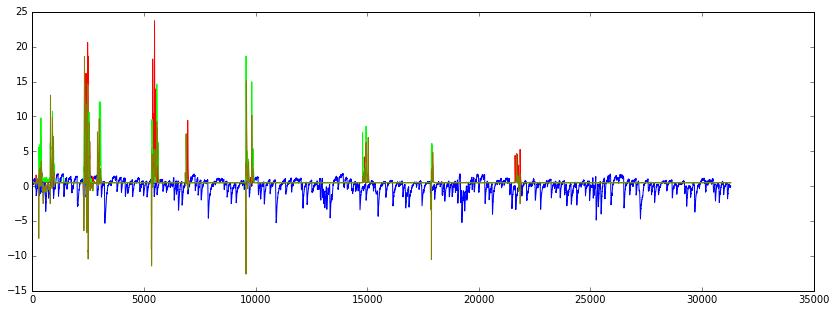


7


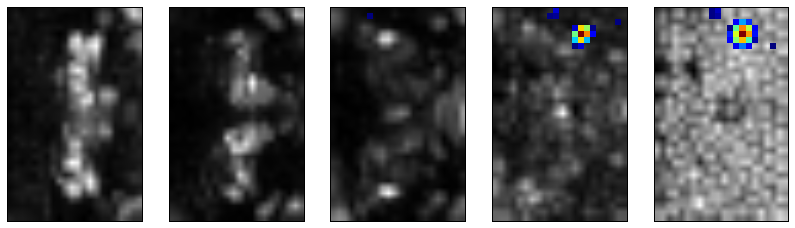

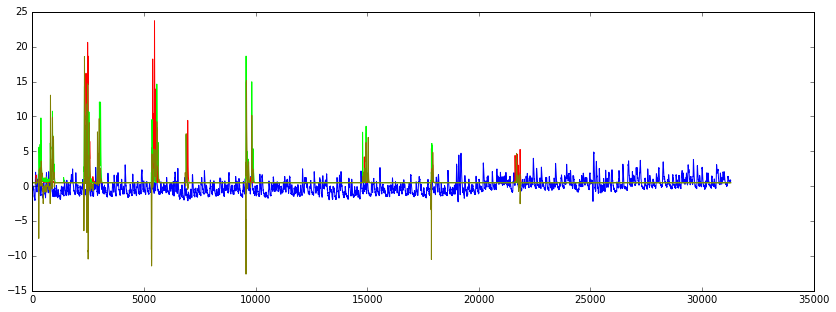


8


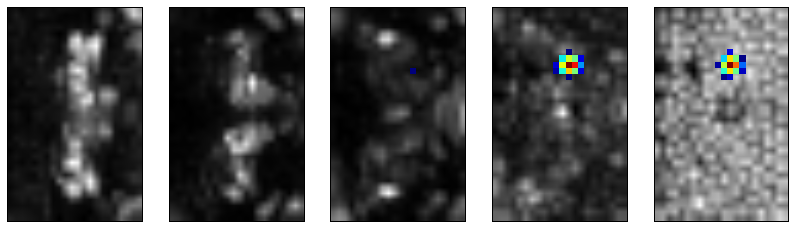

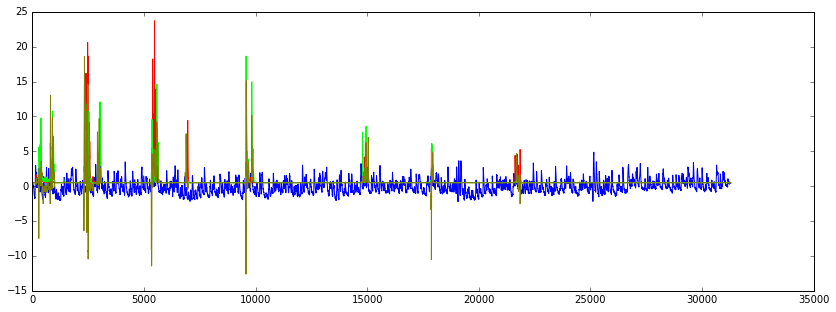


9


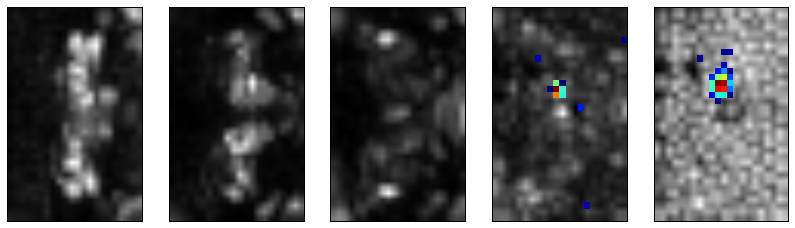

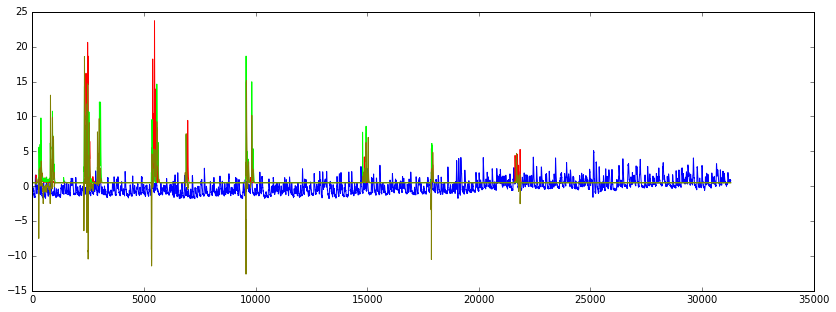


10


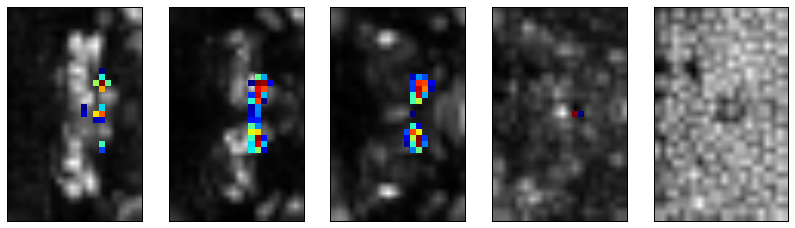

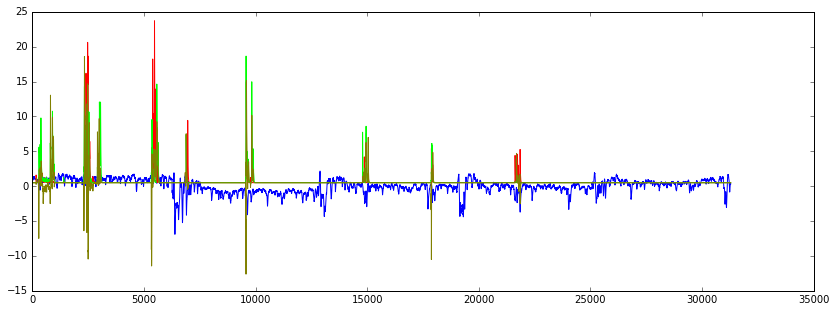


11


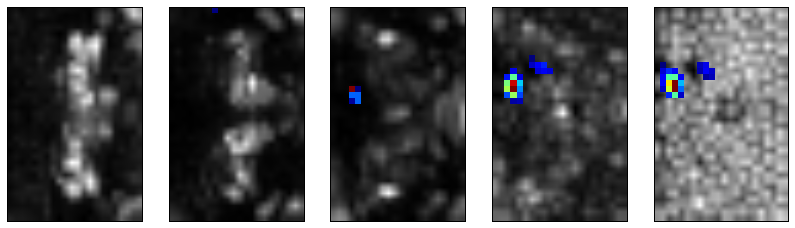

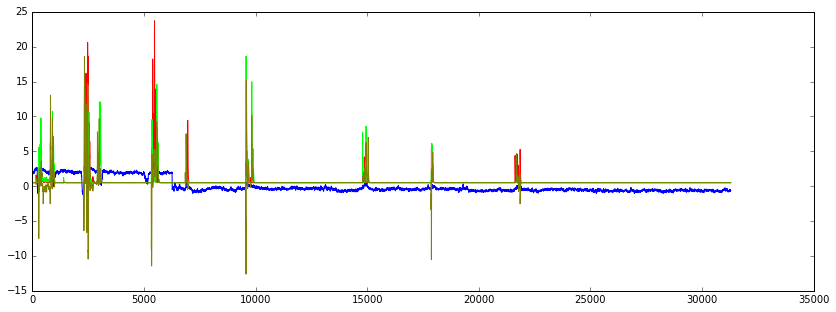


12


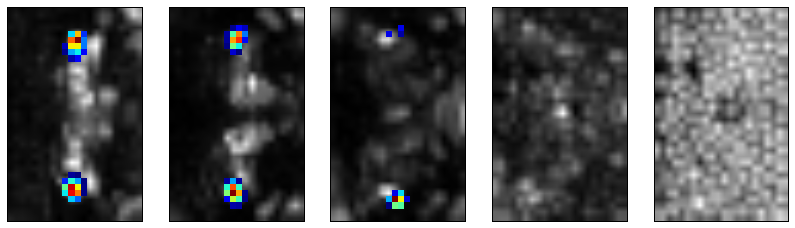

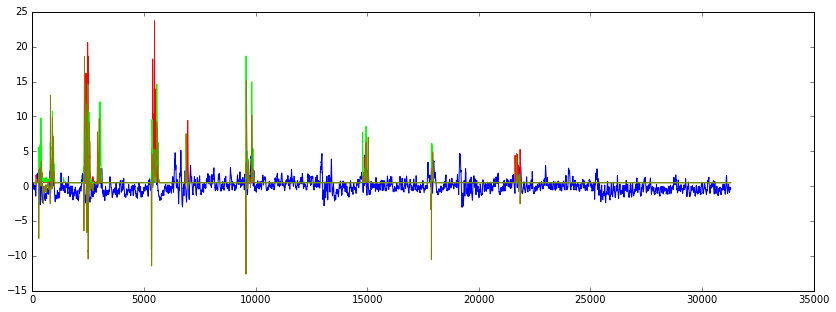


13


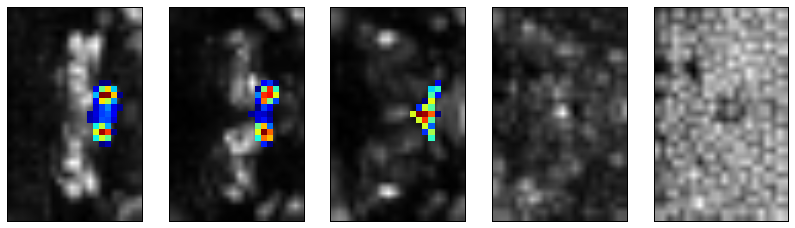

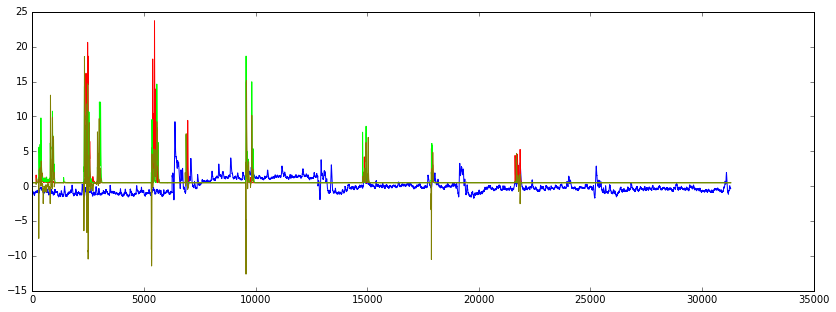


14


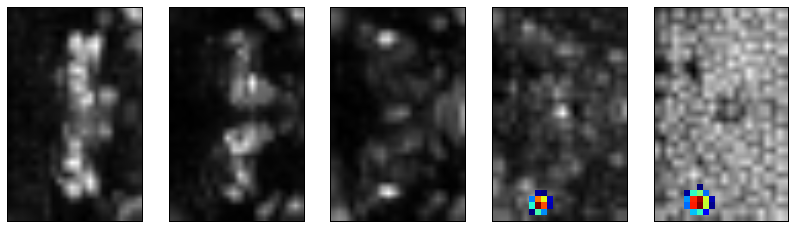

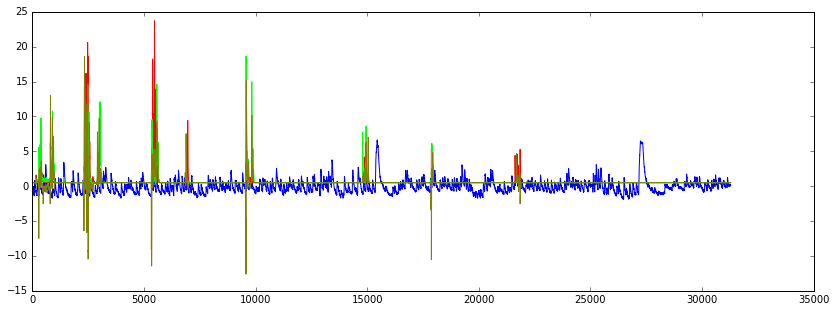


15


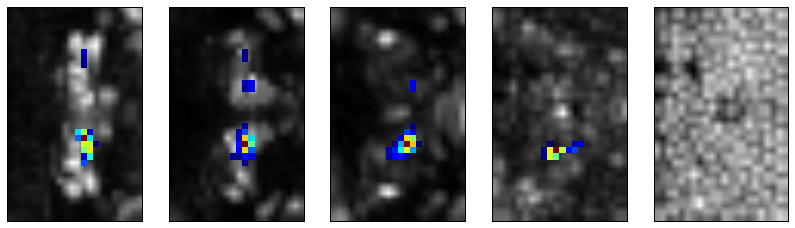

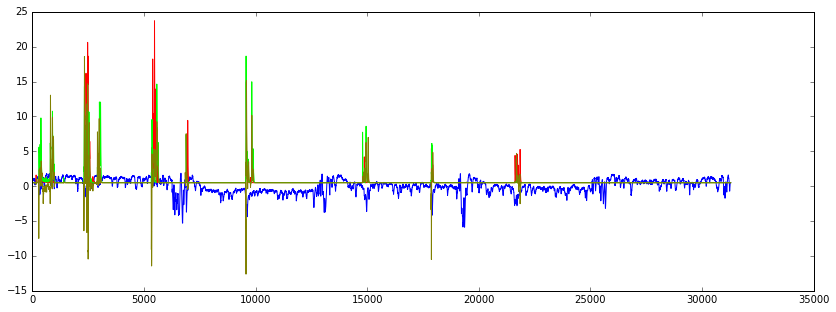


16


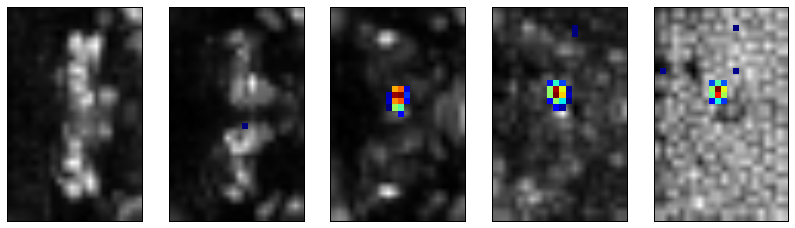

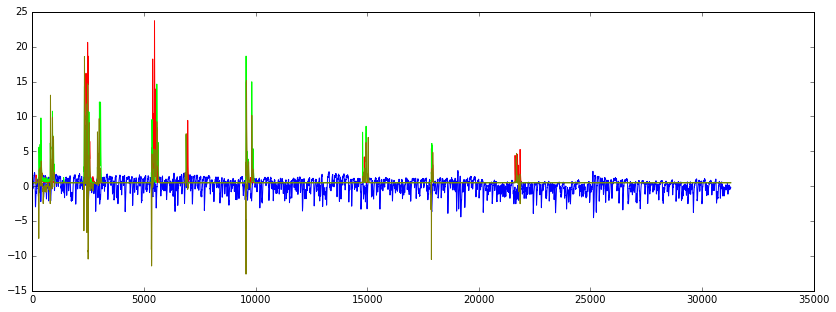


17


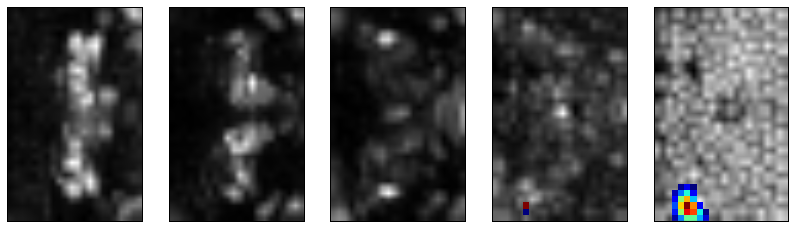

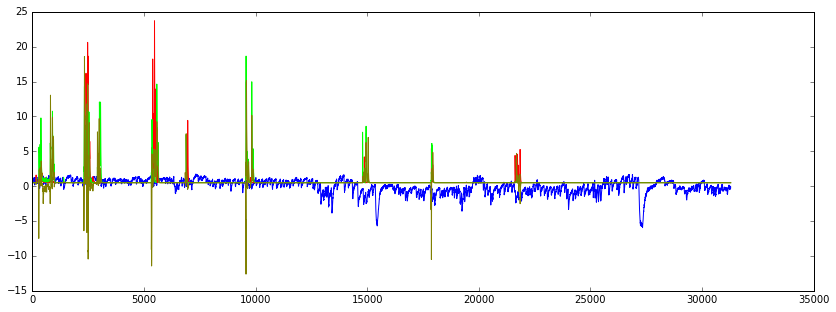


18


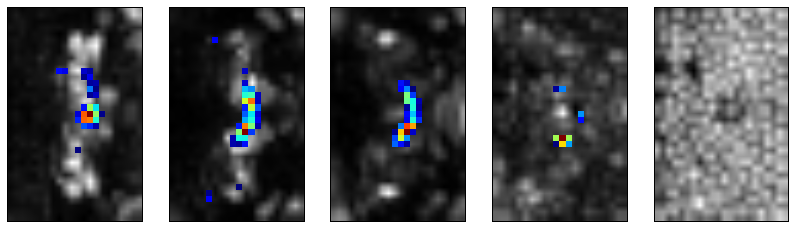

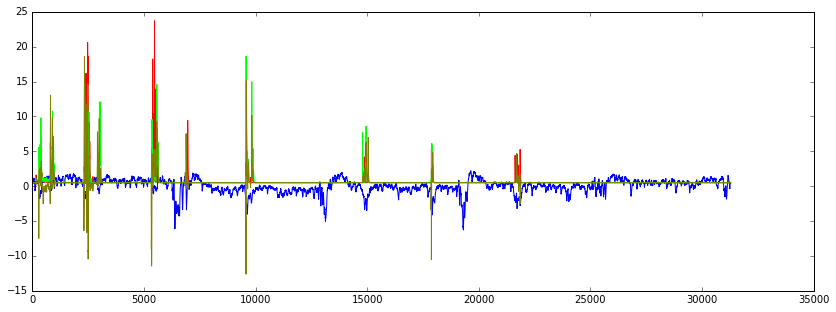


19


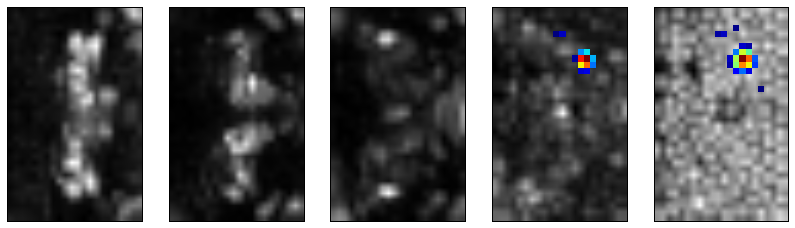

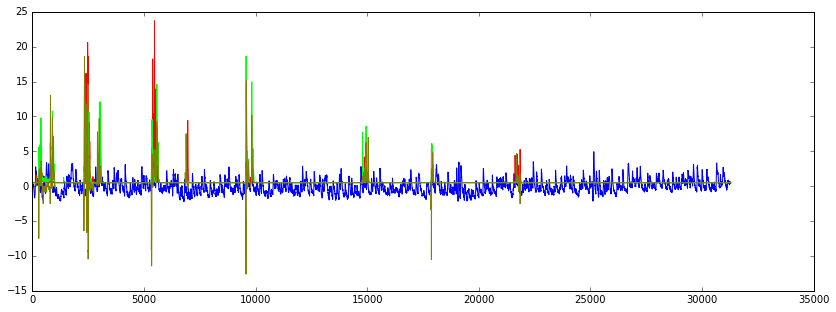


20


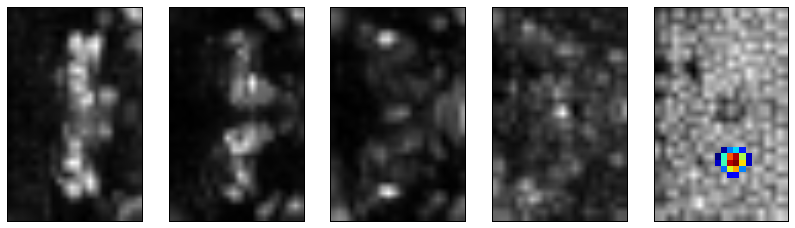

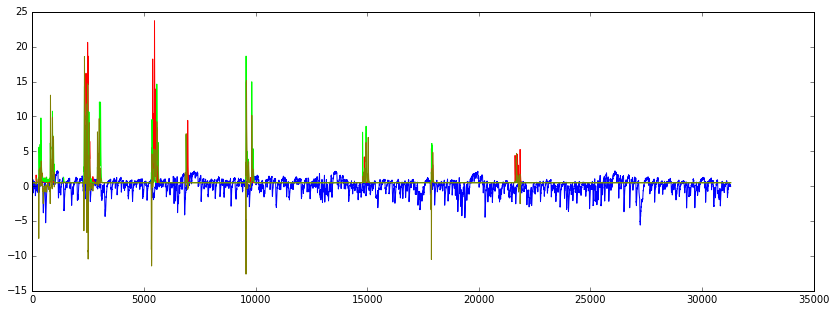


21


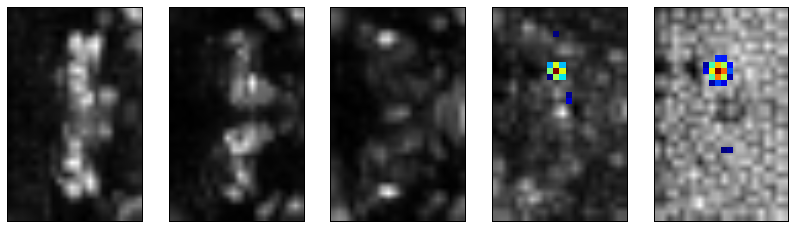

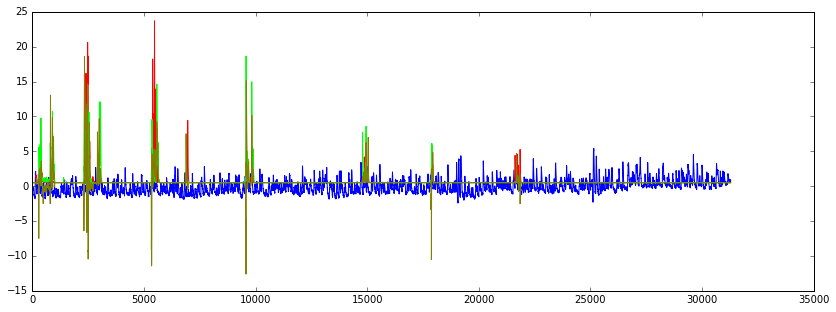


22


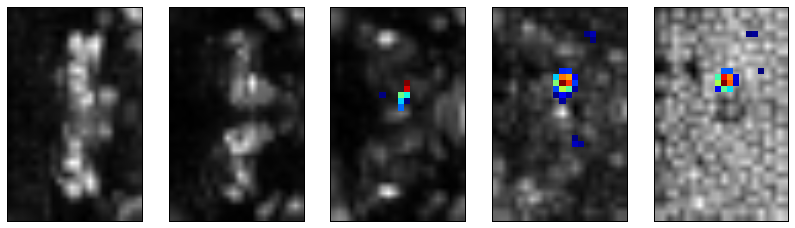

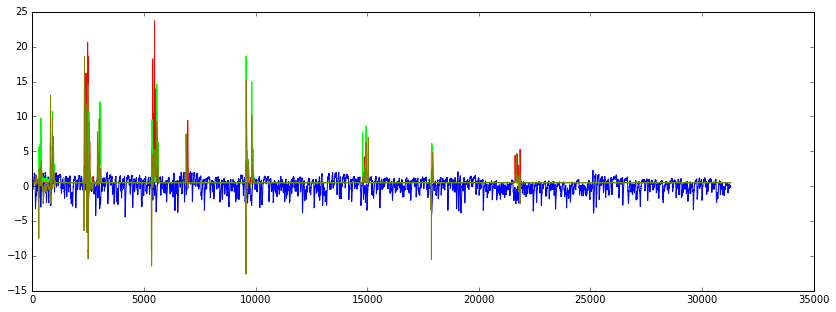


23


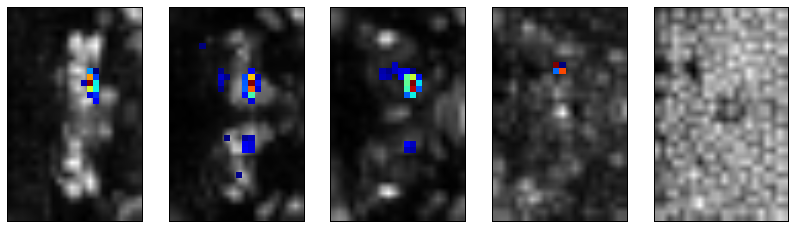

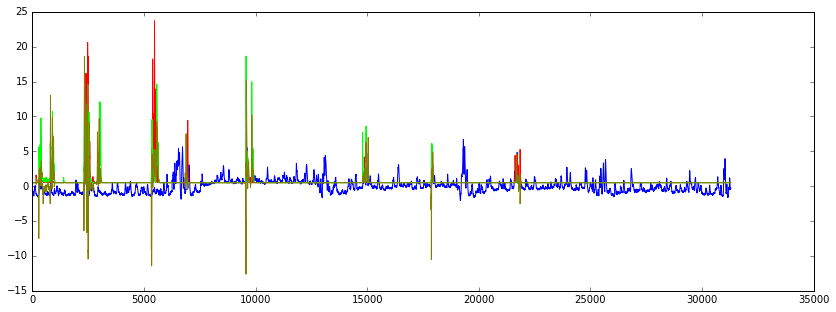


24


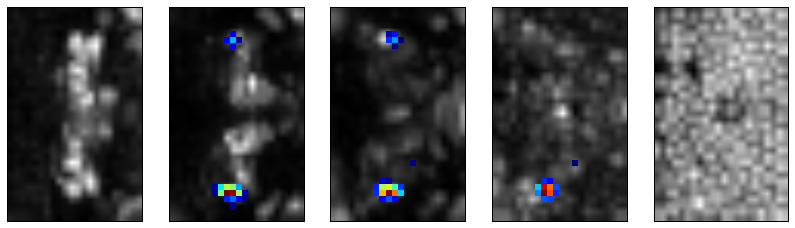

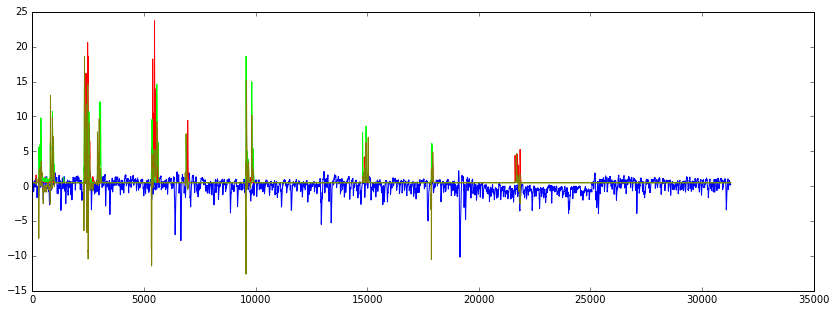


25


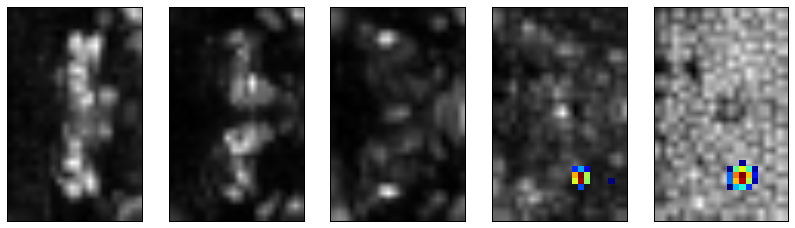

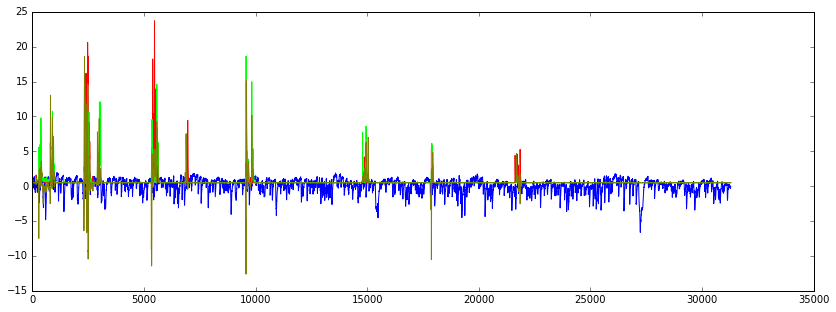


26


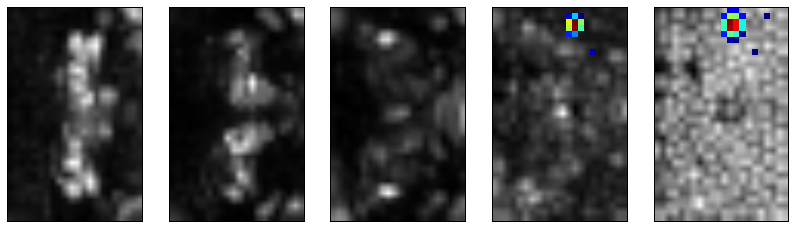

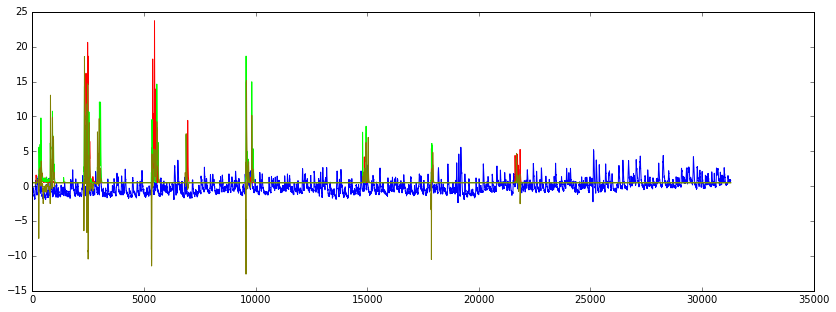


27


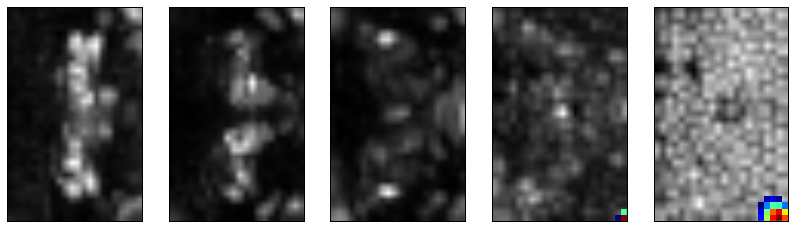

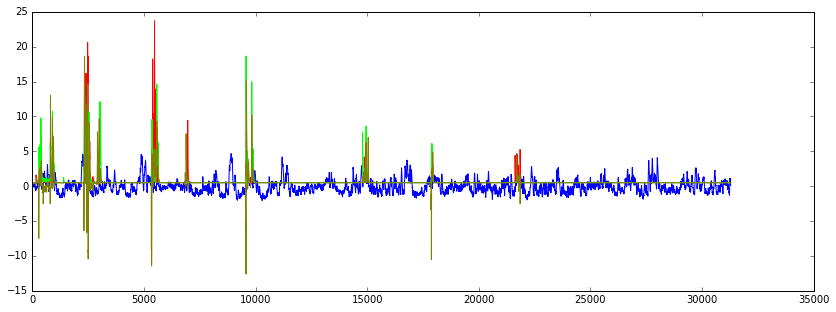


28


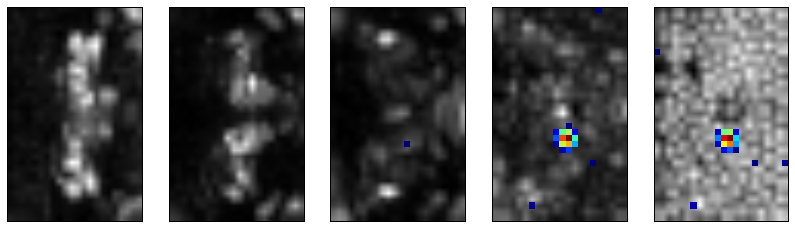

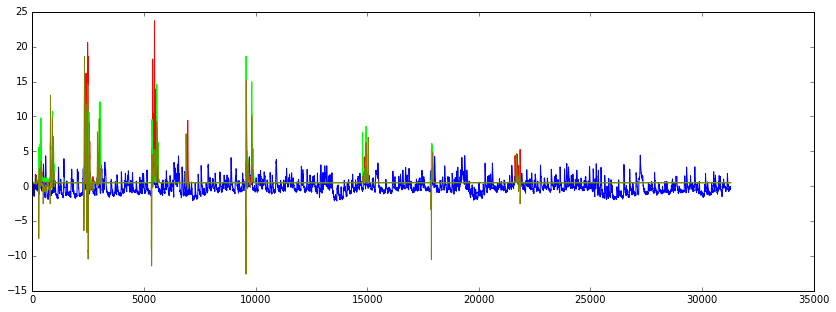


29


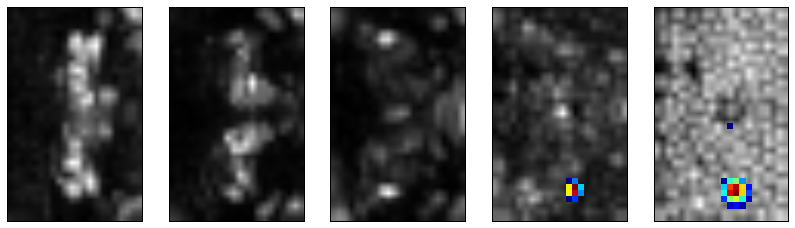

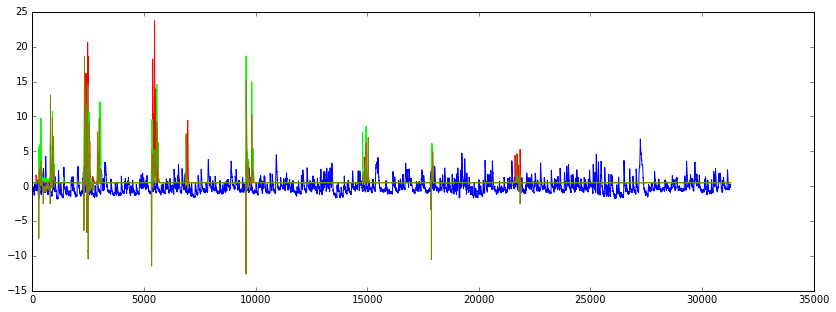


30


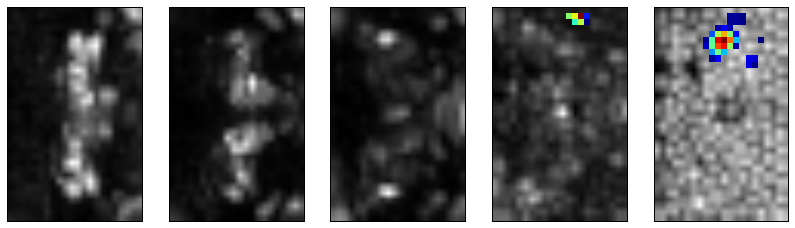

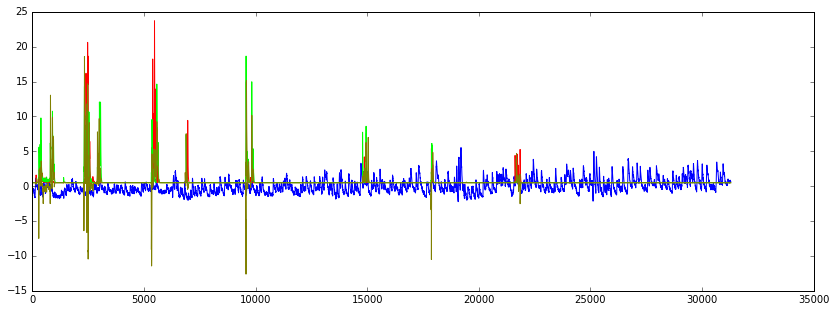


31


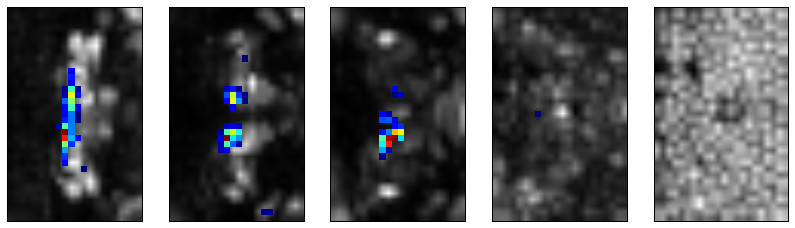

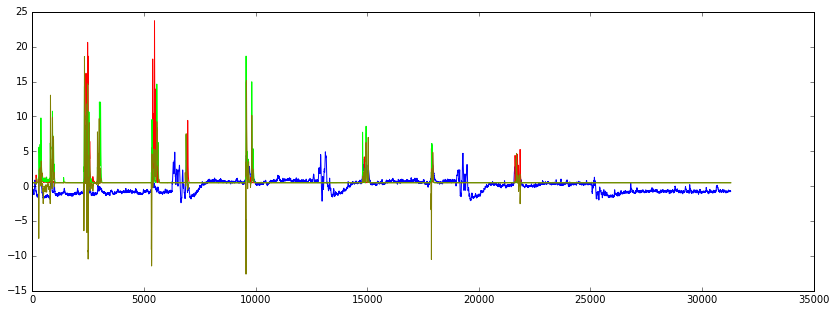


32


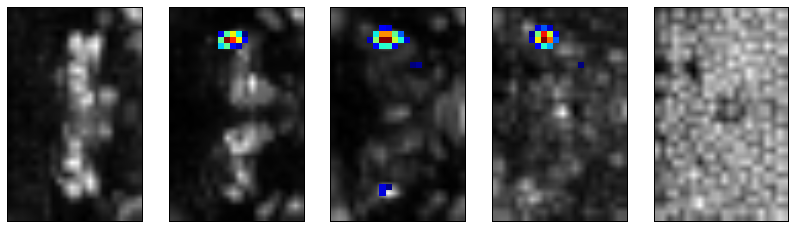

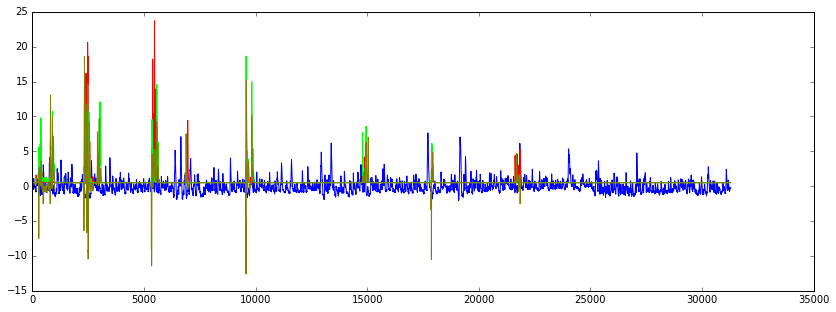


33


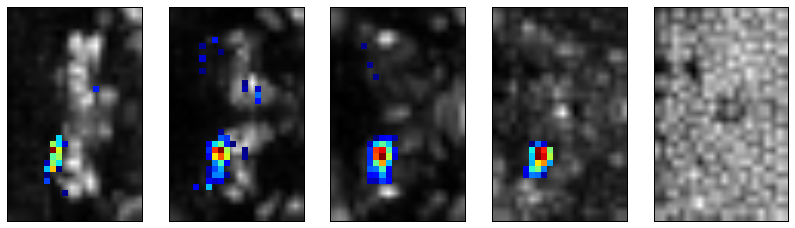

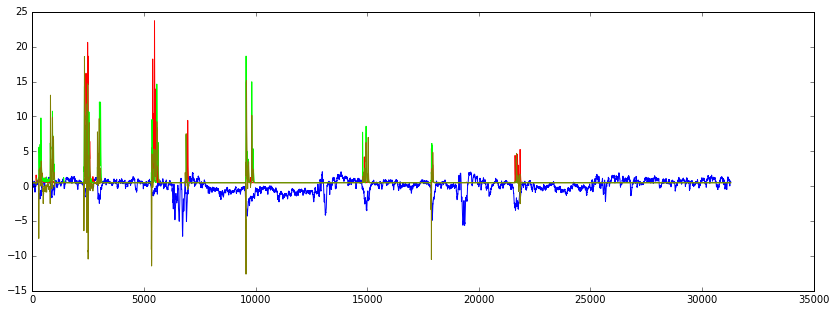


34


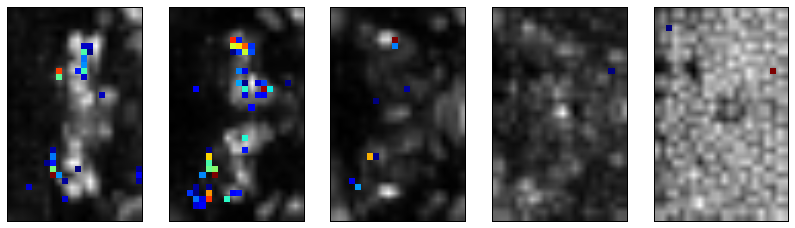

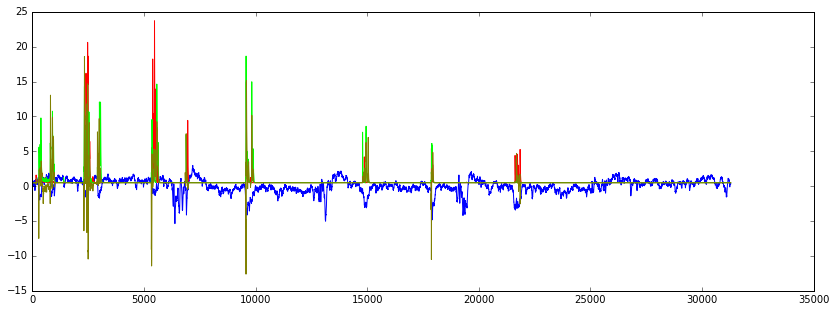


35


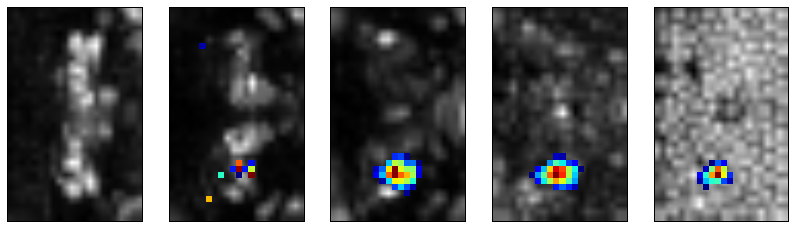

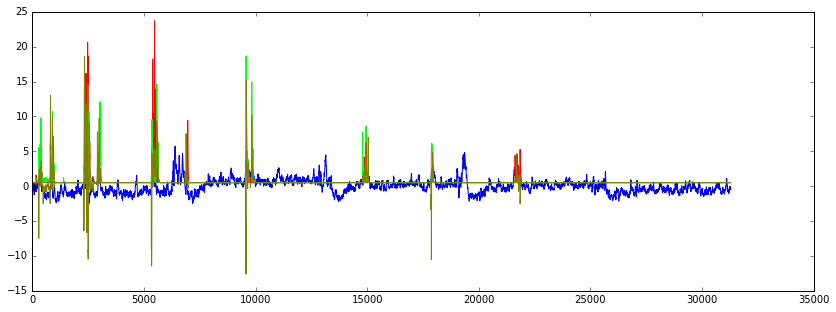


36


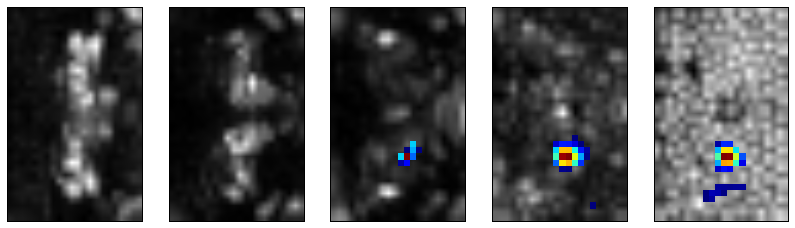

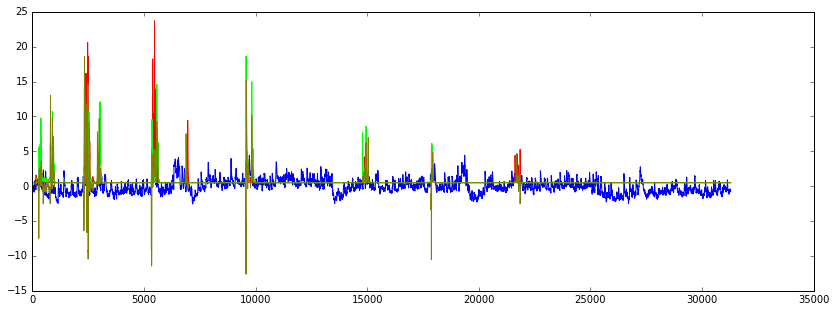


37


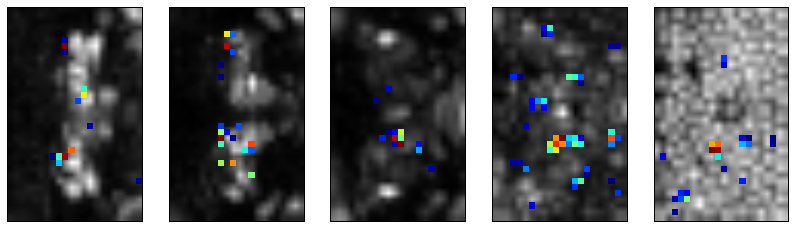

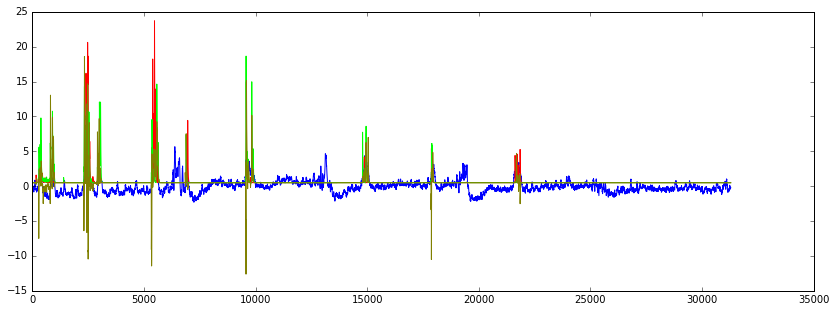


38


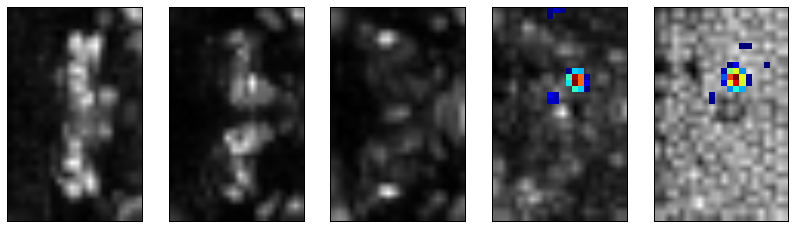

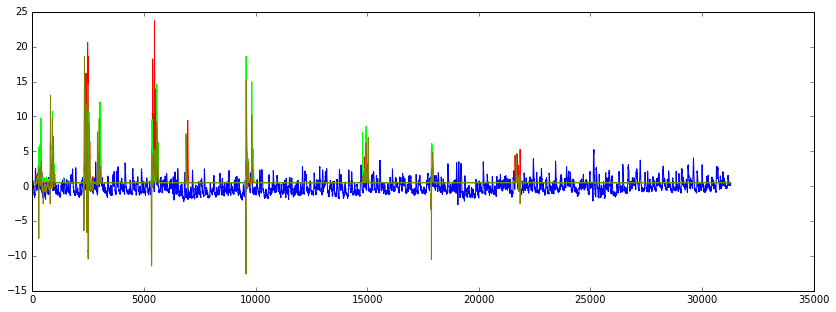


39


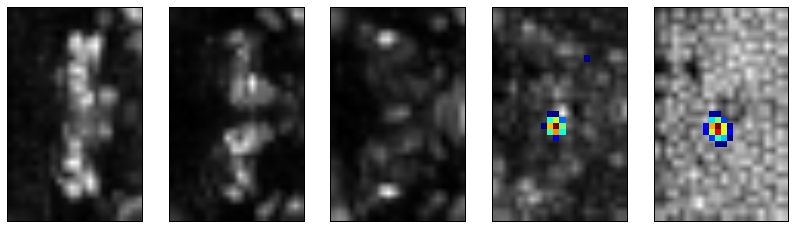

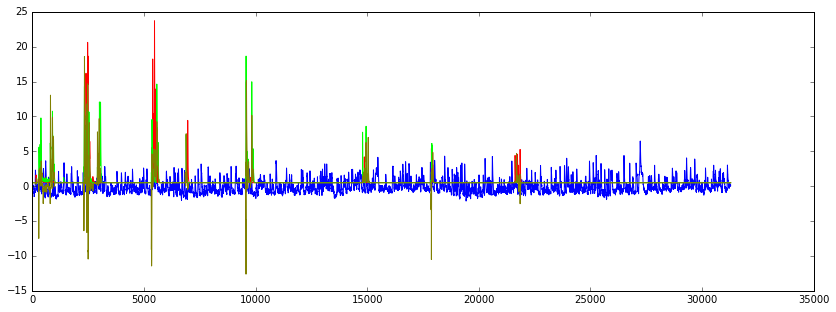


40


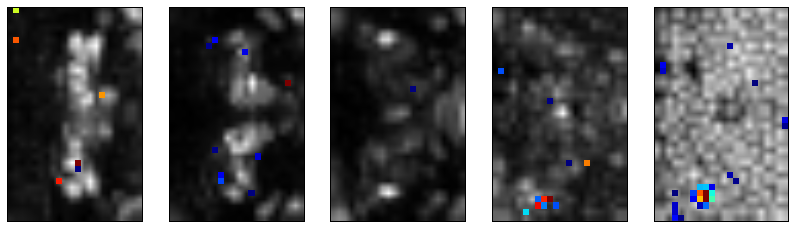

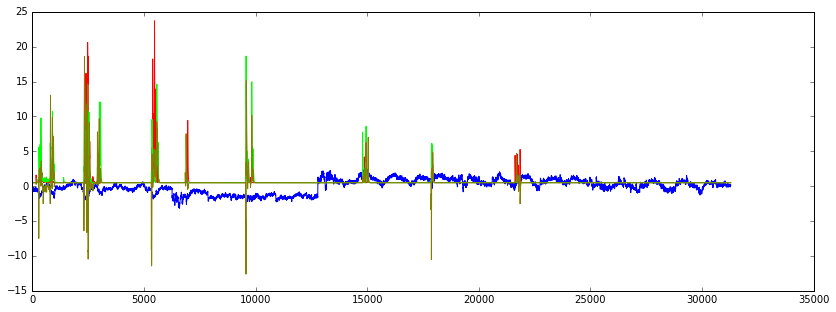


41


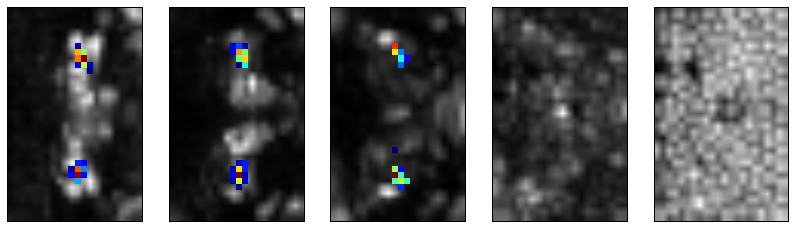

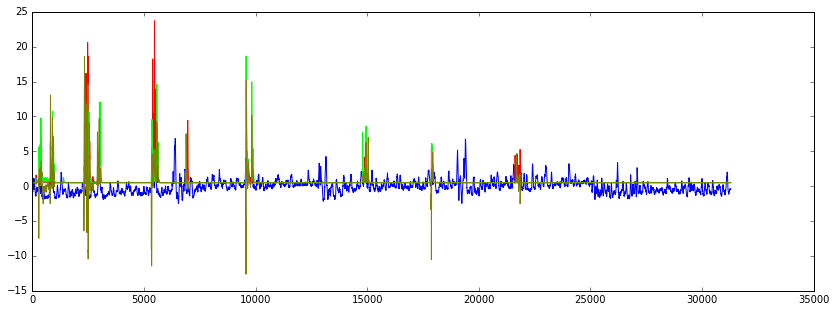


42


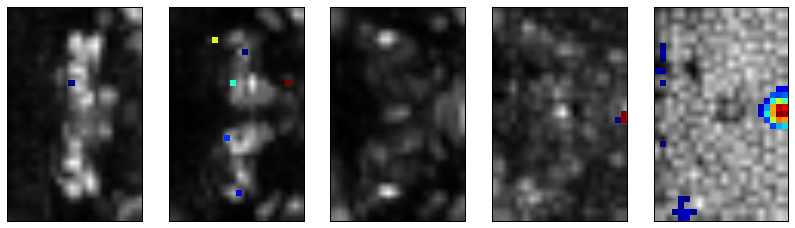

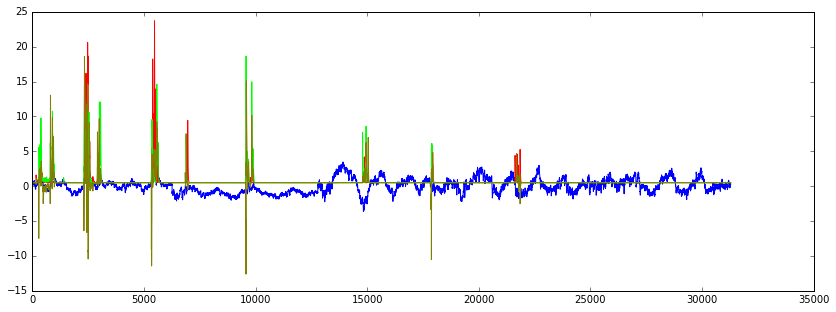


43


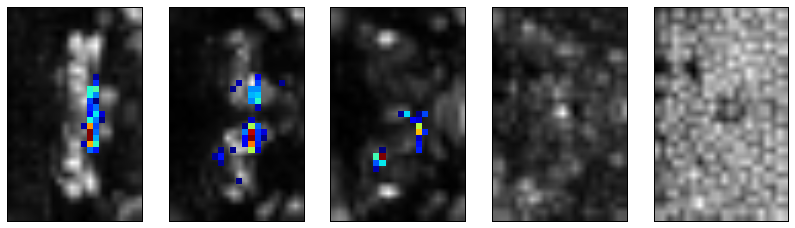

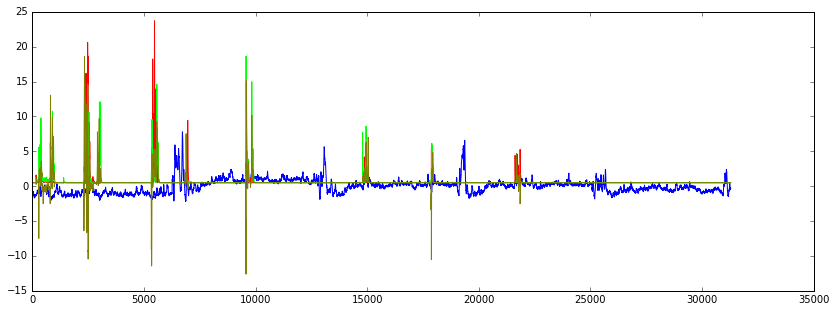


44


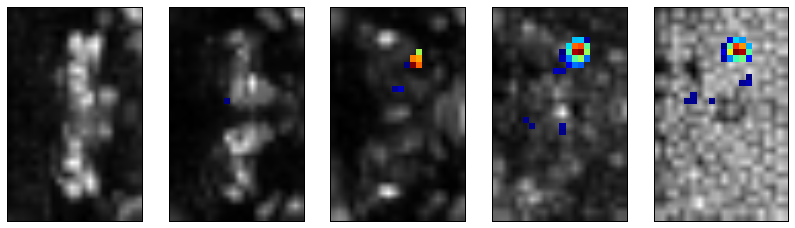

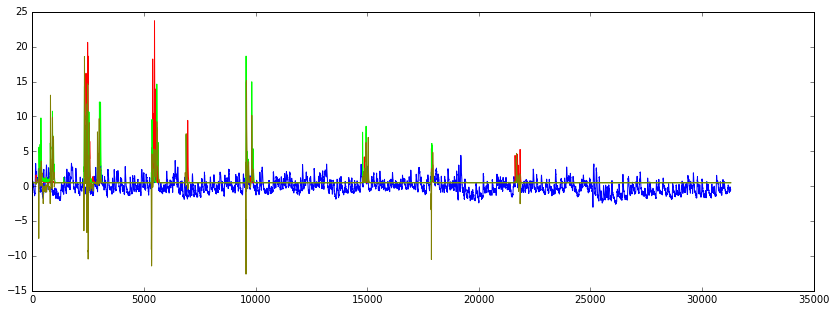


45


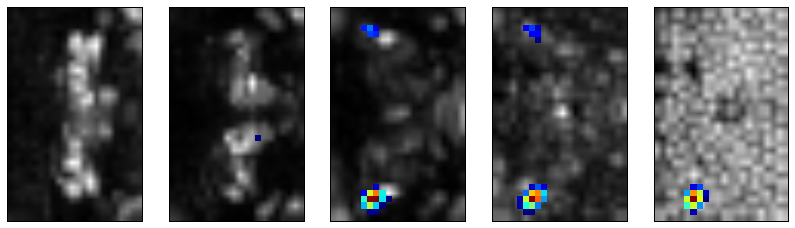

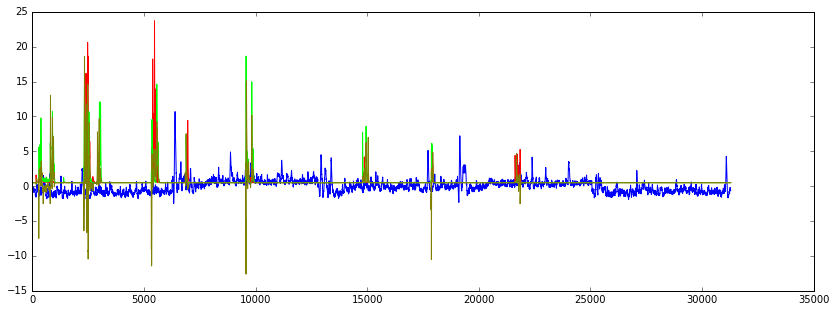


46


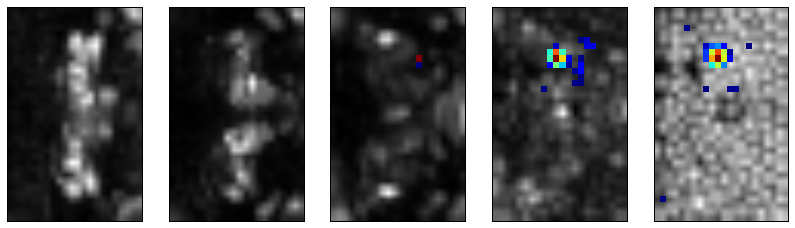

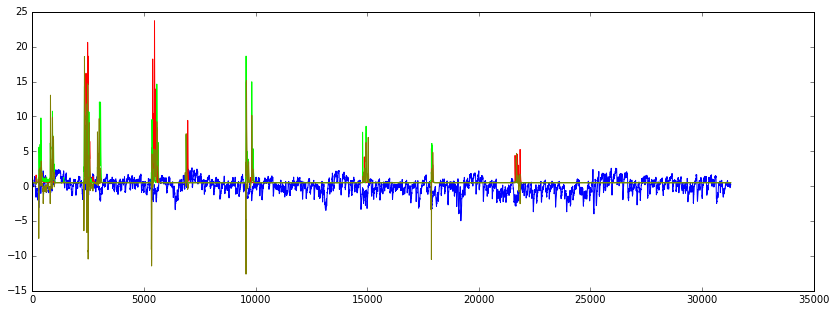

KeyboardInterrupt: 

In [51]:
for j in range(S[3]):

    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,j]
            D1[:,:,i]=V 
            

    print(j)
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    
   # plt.plot(TS_ROI[Order[j],:])
    plt.plot(DTvar[:,j])
    plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
    plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
    plt.plot(Xk[2,:]/np.std(Xk[2,:])+0.5,color=(0.5,0.5,0))    
    #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    
    plt.show()
    
    Label_ICs.append(raw_input())
    if Label_ICs[j]=='':
        Good_ICs[j]=0
    else:
        Good_ICs[j]=1
        
        

In [ ]:



#zip(range(S[3]),Label_ICs)

In [40]:
set(Label_ICs)

{'', 'alpha', 'beta', 'gamma'}

In [41]:
#Label_ICs[94]='M'

In [43]:
Xk=Xk.T

In [42]:
Xk.shape

(31289, 6)

In [52]:
Xksmoothed=np.zeros(Xk[range(3),:].shape)

Xksmoothed[0,:]=np.convolve(Xk[0,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[1,:]=np.convolve(Xk[1,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xksmoothed[2,:]=np.convolve(Xk[2,999:Xk.shape[1]-1000],np.ones(2000)/2000)

Xkdff=Xk[range(3),:]-Xksmoothed

In [53]:
Rsq=np.zeros((1,S[3]))
Betas=np.zeros((3,S[3]))

In [54]:
from sklearn import linear_model

In [55]:
algorithm = linear_model.LinearRegression()

In [56]:
for j in range(S[3]):
    model = algorithm.fit(Xkdff.T, DT[:,j])
    Betas[:,j] = model.coef_
    Rsq[:,j] = model.score(Xkdff.T,DT[:,j])

In [57]:
max(max(Rsq))

0.27347871712173111

0
[ 0.00057297]
[ 0.00118097 -0.00037869  0.00040502]
1
[ 0.00305997]
[ 0.00130102 -0.00175004  0.00136062]
2
[ 0.00521736]
[ 0.00037777  0.00164879 -0.00064747]
6
[ 0.00139542]
[-0.00016811  0.00049606 -0.00059936]
7
[ 0.00411605]
[  3.70774172e-05   5.57293259e-04  -3.90347226e-04]
8
[ 0.01146031]
[ 0.00049598  0.00077532 -0.00030965]
9
[ 0.00190528]
[ 0.00114325  0.00102525 -0.00061806]
11
[ 0.0116253]
[ 0.06324327  0.04449324 -0.01025199]
13
[ 0.00095404]
[ 0.00017629 -0.0002241   0.000145  ]
14
[ 0.00105004]
[ 0.00046232 -0.00106731  0.00135135]
16
[ 0.00302877]
[-0.00270334 -0.00199762  0.00178963]
17
[ 0.00174705]
[-0.00117502  0.0015966  -0.00281948]
19
[ 0.01096534]
[ 0.0005153   0.00331455 -0.00080803]
20
[ 0.00182129]
[-0.00071846  0.00035334  0.00035611]
21
[ 0.00323198]
[ 0.00070477  0.00041117 -0.0002281 ]
22
[ 0.00856318]
[-0.00084232 -0.00110679  0.00035031]
25
[ 0.00170039]
[ -1.16575995e-04   3.24016224e-04  -4.01588471e-05]
26
[ 0.00245625]
[  5.22052639e-05   5.4345

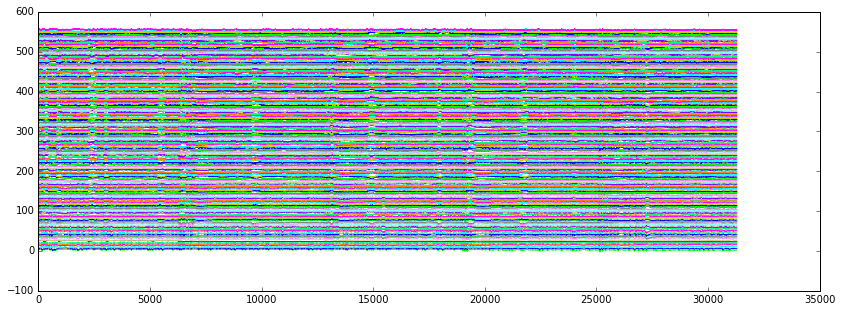

24
[ 0.00615433]
[ 0.00036834  0.0009575   0.00043853]
32
[ 0.0039632]
[ 0.00013425 -0.00018893 -0.00026359]
45
[ 0.00416805]
[ -1.42028195e-04  -2.37526581e-04   4.08878691e-05]
88
[ 0.02447239]
[ 0.0144697   0.00634848 -0.00336279]
144
[ 0.02602811]
[ 0.00036703  0.00024967  0.00024431]
197
[ 0.00858927]
[-0.0001166   0.00079813 -0.00044414]


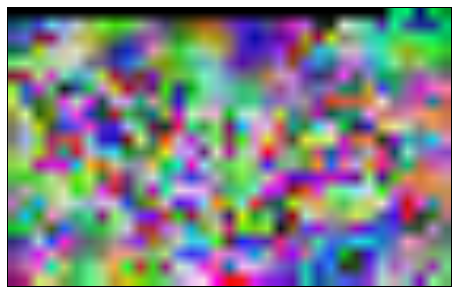

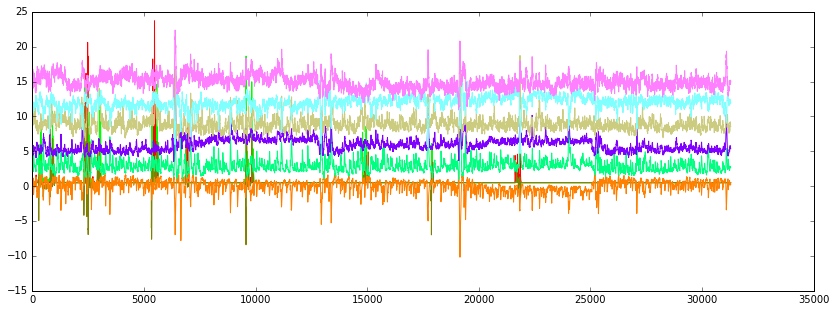

10
[ 0.00210804]
[  1.24130954e-05   2.71186218e-04  -3.51327475e-04]
12
[ 0.03968471]
[ 0.0146608   0.00514938  0.00044511]
15
[ 0.01517912]
[-0.00084968 -0.00073848 -0.00094572]
18
[ 0.03789365]
[-0.00049815 -0.00034233 -0.00020627]
23
[ 0.00730566]
[ 0.00222103  0.00055584  0.0042988 ]
43
[ 0.00650989]
[ -5.68411831e-05  -9.46665411e-05   3.54085226e-05]
104
[ 0.03746003]
[ 0.0008555   0.00028725  0.00029841]


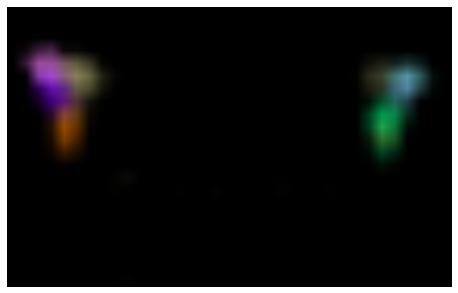

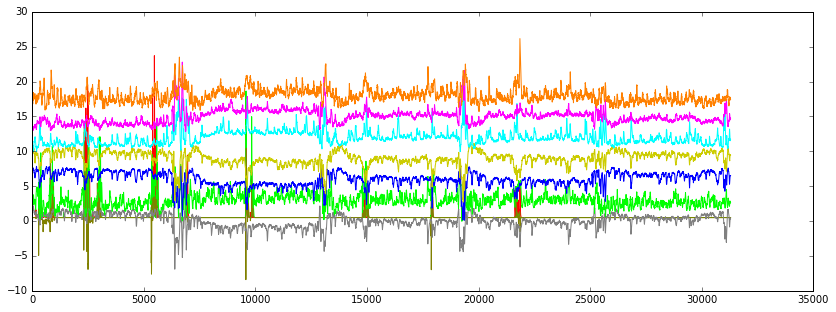

3
[ 0.16974401]
[ 0.0034445   0.00234131  0.00116138]
4
[ 0.03579985]
[ 0.0054421   0.00631761  0.00308767]
5
[ 0.03699357]
[ 0.00197756  0.00133676  0.00151937]
31
[ 0.04118636]
[ 0.00203547  0.00165723  0.00122187]
41
[ 0.04285258]
[ 0.00655772  0.00260166  0.00171196]
53
[ 0.02638086]
[ 0.0016544   0.00064488  0.00047737]
58
[ 0.01473388]
[-0.00165303 -0.0013008  -0.00153873]
115
[ 0.00643527]
[ 0.0006448   0.00066225  0.00028972]
[0, 1, 2, 6, 7, 8, 9, 11, 13, 14, 16, 17, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 1

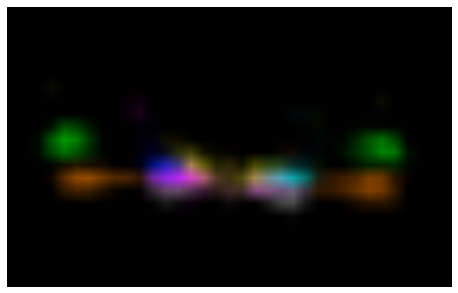

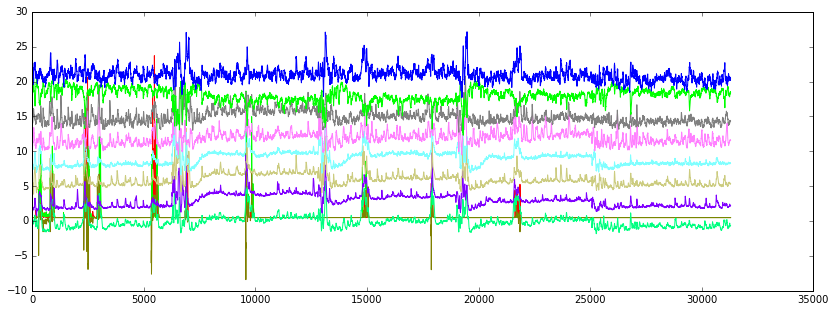

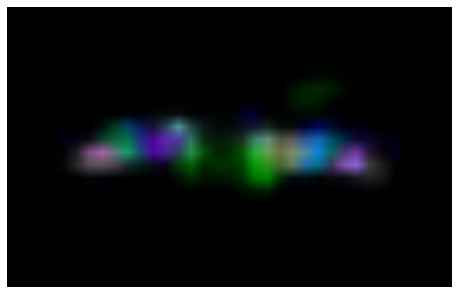

In [58]:
List1=[(Label_ICs[i],i) for i in range(S[3])]
Newlist=sorted(List1, key=lambda List1: List1[0])

Neworder=[Newlist[i][1] for i in range(S[3])]

NewDT=DTvar[:,Neworder[:]].T

for j in range(len(Neworder)):
    A=NewDT[:,j]
    V=np.sqrt(np.var(A))
    NewDT[:,j]=A/V

C1=np.zeros([16,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
C1[6][:]=(1,0.5,0)
C1[7][:]=(0,1,0.5)
C1[8][:]=(0.5,0,1)
C1[9][:]=(0.8,0.8,0.5)
C1[10][:]=(0.5,1,1)
C1[11][:]=(1,0.5,1)
C1[12]=(0.5,0.5,0.5)
C1[13]=(0.2,0.5,0.5)
C1[14]=(0.5,0.2,0.5)
C1[15]=(0.5,0.5,0.2)
h=3

Newmaps=Dmaps[:,:,:,Neworder[:]]

L=len(set([Label_ICs[Neworder[i]] for i in range(len(Neworder))]))

Regionmaps=np.zeros([S[0],S[1],L,3])
Datasort=np.zeros([S[0],S[1],S[2],L,3])

Regionname=[]

DMapsordered=Dmapso[:,:,:,Neworder[:]]

j=0
i=0
k=Label_ICs[Neworder[0]]
m=0
Regionname.append(Label_ICs[Neworder[i]])
for i in range(len(Neworder)):
    
    #C2=C1[i%6][:]
    for l in range(3):
        M=np.max(np.squeeze(np.reshape(Newmaps[:,:,:,i],S[0]*S[1]*S[2])))
        Regionmaps[:,:,j,l]=Regionmaps[:,:,j,l]+0.6*np.max(DMapsordered[:,:,:,i],2)*C1[i%12+1][l]/M
        Datasort[:,:,:,j,l]=Datasort[:,:,:,j,l]+Dmaps[:,:,:,Neworder[i]]*C1[i%15+1][l] 
    i=i+1
    m=m+1
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
        
    if k1 != k:
        j=j+1
        k=k1
        m=0
        Regionname.append(Label_ICs[Neworder[i]])

pylab.rcParams['figure.figsize'] = (14, 5)
import scipy
from scipy import ndimage
j=0
m=0
L=0
k=Label_ICs[Neworder[0]]
for i in range(len(Neworder)):
    m=m+1
    
    
    if i<len(Neworder):
        k1=Label_ICs[Neworder[i]]
        
    if k1 != k:
        
        k=k1
        m=0
        
        plt.show()
        plt.figure(2*j+1)
        Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
        IM=plt.imshow(Rotated_Plot) 
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        j=j+1
        plt.figure(2*j)
        plt.plot(Xk[0,:]/np.std(Xk[0,:])+0.5,color=(1,0,0))   
        plt.plot(Xk[1,:]/np.std(Xk[1,:])+0.5,color=(0,1,0))
        plt.plot(Xk[2,:]/np.std(Xk[1,:])+0.5,color=(0.5,0.5,0))    
        #plt.plot(Xk[3,:]/np.std(Xk[1,:])+0.5,color=(0,0.5,1))
    plt.plot(NewDT[i,:]+h*m,color=C1[i%12+1][:])
    print(Neworder[i])
    print(Rsq[:,Neworder[i]])
    print(Betas[:,Neworder[i]])
plt.figure(2*j+1)
Rotated_Plot = ndimage.rotate(Regionmaps[:,:,j], -90)
IM=plt.imshow(Rotated_Plot)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
print(Neworder)

In [ ]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [ ]:
Ua=sio.loadmat(filename)
Xk=Ua['Xk']

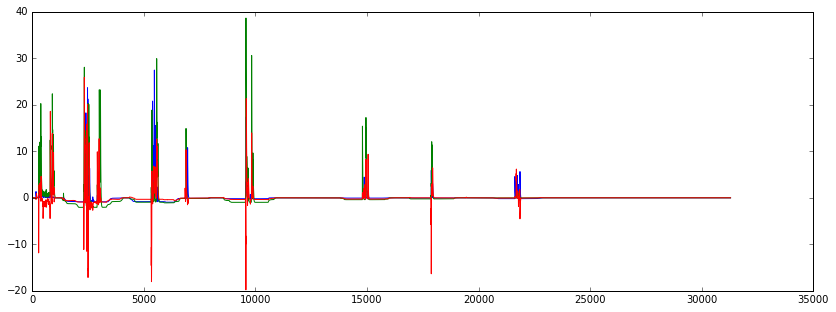

In [63]:
plt.plot(Xkdff[range(3),:].T)